<a href="https://colab.research.google.com/github/gabgro/image-classification-DL/blob/main/image_classification_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Dividindo o dataset em dados de treino e dados de teste
 (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


Text(0.5, 1.0, '5')

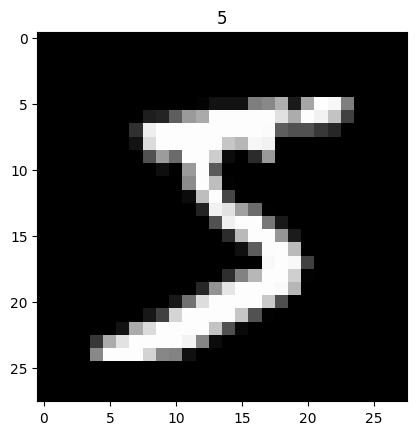

In [ ]:
#Mostrando uma das imagens do conjunto de treinamento
plt.imshow(x_train[0], cmap='gray')
plt.title(f"{y_train[0]}")

In [ ]:
#Normalização
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [ ]:
#Aumentando a dimensão
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [ ]:
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
#Etiquetas em one hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [ ]:
#Criando o modelo
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28,1)),
        #layers.Conv2D(4, kernel_size=(2,2), activation="relu"),
        #layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ]
)

In [ ]:
#Checando os detalhes do modelo
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Hiperparâmetros
batch_size = 128
epochs = 30
loss = "categorical_crossentropy"
optim = "adam"
metrics = ["accuracy"]
model.compile(loss=loss,
              optimizer=optim,
              metrics=metrics)

In [ ]:
#Divido a base de treino para criar uma de validação
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle = True, stratify = y_train)

In [ ]:
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(24576, 28, 28, 1) (6144, 28, 28, 1) (24576, 10) (6144, 10)


In [ ]:
#Treinando o modelo, o shuffle tem a função de randomizar a base de dados em cada época
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val),
                    shuffle = True)

Epoch 1/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6048 - loss: 1.4214 - val_accuracy: 0.8656 - val_loss: 0.5629
Epoch 2/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8744 - loss: 0.5121 - val_accuracy: 0.8923 - val_loss: 0.4294
Epoch 3/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8878 - loss: 0.4131 - val_accuracy: 0.9007 - val_loss: 0.3807
Epoch 4/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9045 - loss: 0.3577 - val_accuracy: 0.9062 - val_loss: 0.3552
Epoch 5/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9068 - loss: 0.3354 - val_accuracy: 0.9097 - val_loss: 0.3387
Epoch 6/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9117 - loss: 0.3139 - val_accuracy: 0.9136 - val_loss: 0.3283
Epoch 7/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9112 - loss: 0.3113 - val_accuracy: 0.9116 - val_loss: 0.3202
Epoch 8/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9156 - loss: 0.3029 - val_accuracy: 0.

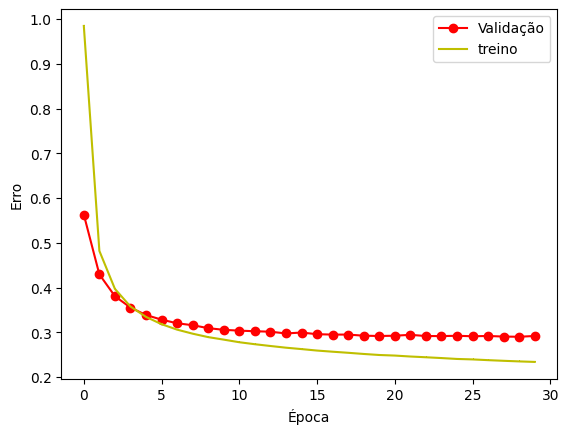

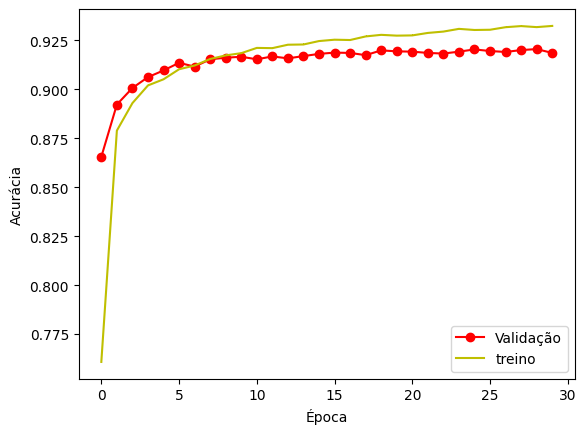

In [ ]:
#Monitorando o treinamento
plt.figure()
plt.plot(history.epoch, history.history['val_loss'],"o-r", label='Validação')
plt.plot(history.epoch, history.history['loss'],",-y", label='treino')
plt.xlabel("Época")
plt.ylabel("Erro")
plt.legend()
plt.figure()
plt.plot(history.epoch, history.history['val_accuracy'],"o-r", label='Validação')
plt.plot(history.epoch, history.history['accuracy'],",-y", label='treino')
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()

In [ ]:
#Teste do modelo
score = model.evaluate(x_test, y_test, verbose=0)
print("Custo na base de teste:", score[0])
print("Acurácia na base de teste:", score[1])

Custo na base de teste: 0.274896502494812
Acurácia na base de teste: 0.9243999719619751


In [ ]:
#Pegando a matriz com as probabilidades preditas para cada classe referentes a cada amostra, depois pegando a classe com maior probabilidade com o argmax
y_test_hat = model.predict(x_test)
y_pred = np.argmax(y_test_hat,axis=1)
y_true = np.argmax(y_test,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


<Axes: >

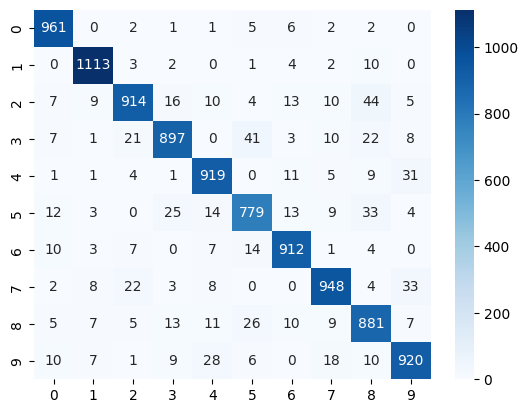

In [ ]:
#Matriz de confusão
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")